In [1]:
from homework3.Homework_3_function_headers_group_3 import fdtd_3d
import numpy as np
import matplotlib.pyplot as plt

In [2]:
background_dark = True
if background_dark:
    plt.style.use('dark_background')

In [3]:
c = 2.99792458e8 # speed of light [m/s]
mu0 = 4*np.pi*1e-7 # vacuum permeability [Vs/(Am)]
eps0 = 1/(mu0*c**2) # vacuum permittivity [As/(Vm)]
Z0 = np.sqrt(mu0/eps0) # vacuum impedance [Ohm]
Nx = 199 # number of grid points in x-direction
Ny = 201 # number of grid points in y-direction
Nz = 5   # number of grid points in z-direction
dr = 30e-9 # grid spacing in [m]
time_span = 10e-15 # duration of simulation [s]
freq = 500e12 # pulse [Hz]
tau = 1e-15 # pulse width [s]
source_width = 2 # width of Gaussian current dist. [grid points]
w = source_width * dr

In [4]:
eps_rel = np.ones((Nx, Ny, Nz))

jx = np.zeros((Nx, Ny, Nz))
jy = np.zeros((Nx, Ny, Nz))
x = np.linspace(-(Nx//2), Nx//2, Nx) * dr
y = np.linspace(-(Ny//2), Ny//2, Ny) * dr
YY, XX = np.meshgrid(y, x)
jz = np.exp(-(XX**2+YY**2)/w**2)
jz = jz[..., np.newaxis]
jz = np.repeat(jz, 5, 2)

midz = int(np.ceil((Nz-1)/2))
z_ind = midz
output_step = 4

In [5]:
ref, t = fdtd_3d(eps_rel, dr, time_span, freq, tau, jx, jy, jz, field_component='ez', z_ind=z_ind, output_step=4, dt= 5e-17 /50)

In [6]:
Nx = 199
Ny = 201
Nz = 5
time_span = 10e-15
dr = 30e-9
dt =  5e-17 / np.linspace(1, 10, 19)

eps_rel = np.ones((Nx, Ny, Nz))
x = np.linspace(-(Nx//2), Nx//2, Nx) * dr
y = np.linspace(-(Ny//2), Ny//2, Ny) * dr
jx = np.zeros((Nx, Ny, Nz))
jy = np.zeros((Nx, Ny, Nz))
YY, XX = np.meshgrid(y, x)
jz = np.exp(-(XX**2+YY**2)/w**2)
jz = jz[..., np.newaxis]
jz = np.repeat(jz, 5, 2)

midz = int(np.ceil((Nz-1)/2))
z_ind = midz
output_step = 4

In [7]:
results = []
for dti in dt:
    Ez, t = fdtd_3d(eps_rel, dr, time_span, freq, tau, jx, jy, jz, field_component='ez', z_ind=z_ind, output_step=4, dt=dti)
    results.append(Ez)

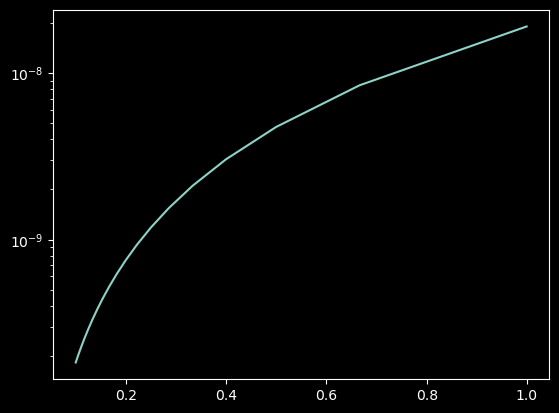

In [8]:
err = []
for res in results:
    # e = np.abs(res[-1].max().real - ref[-1].max().real) / ref[-1].max().real
    e = np.sqrt(np.mean(np.square(res.real[-1] - ref.real[-1])))
    err.append(e)
plt.plot(dt/dr*2*c, err)
plt.yscale('log')

In [111]:
len_x = 50 * 30e-9
len_y = 50 * 30e-9
Nz = 5
time_span = 4.5e-15
dt = 50e-18
midz = int(np.ceil((Nz-1)/2))
z_ind = midz
output_step = 1

In [112]:
dr = 30e-9 / np.linspace(1, 20, 20)
results_dx = []
for dri in dr:
    Nx = int(round(len_x/dri) + 1)
    Ny = int(round(len_y/dri) +1)
    eps_rel = np.ones((Nx, Ny, Nz))
    x = np.linspace(-(Nx//2), Nx//2, Nx) * dri
    y = np.linspace(-(Ny//2), Ny//2, Ny) * dri
    jx = np.zeros((Nx, Ny, Nz))
    jy = np.zeros((Nx, Ny, Nz))
    YY, XX = np.meshgrid(y, x)
    jz = np.exp(-(XX**2+YY**2)/w**2)
    jz = jz[..., np.newaxis]
    jz = np.repeat(jz, 5, 2)
    Ez, t = fdtd_3d(eps_rel, dri, time_span, freq, tau, jx, jy, jz, field_component='ez', z_ind=z_ind, output_step=40, dt=5e-18/2)
    results_dx.append(Ez)

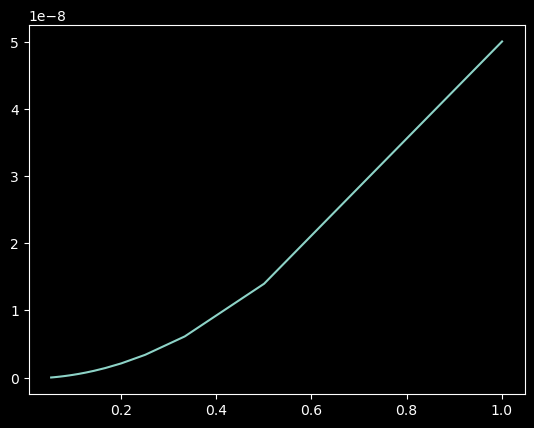

In [115]:
err_dx = []
ref = results_dx[-1]
ref = ref[-1,::20,::20]
for dri, res in zip(np.linspace(1, 19, 19).astype('int'), results_dx):
    res = res[-1,::dri,::dri]
    e = np.sqrt(np.mean(np.square(res.real - ref.real)))
    err_dx.append(e)
plt.plot(dr[:-1]/dt/2/c, err_dx)